In [56]:
import pandas as pd

In [57]:
man_df = pd.read_csv('data/caesar_fr.csv', encoding='utf-8', sep=';')
man_df=man_df.sample(frac=1)

In [58]:
caesar_male = man_df[man_df['sex'] == 1]

In [59]:
data=pd.DataFrame()

In [60]:
data=caesar_male.copy()

In [61]:
data.describe()

taille          age       weight     sex  tour_de_cheville  \
count  2106.000000  2102.000000  2106.000000  2107.0       2107.000000   
mean    177.913588    37.538297    82.985266     1.0         26.720221   
std       8.431030    12.763015    17.167743     0.0          1.545217   
min     131.495800    17.500000    45.812792     1.0         22.199600   
25%     172.212000    26.200000    70.801175     1.0         25.704800   
50%     177.495200    37.000000    80.058988     1.0         26.593800   
75%     183.311800    47.000000    91.398788     1.0         27.711400   
max     218.287600    79.000000   181.436800     1.0         36.703000   

       longueur_du_bras  largeur_du_dos  tour_de_ventre_maximal  \
count       2104.000000     2052.000000                  2107.0   
mean          64.139418       41.485936                     0.0   
std            3.591747        2.403755                     0.0   
min           40.894000       33.147000                     0.0   
25%           61.798200       39.801800                     0.0   
50%           64.008000       41.478200                     0.0   
75%           66.395600       43.027600                     0.0   
max           80.391000       50.165000                     0.0   

       tour_de_poitrine  tour_de_poitrine_mesure_a_la_main  ...  \
count       2106.000000                                0.0  ...   
mean         101.697680                                NaN  ...   
std           10.616289                                NaN  ...   
min           75.793600                                NaN  ...   
25%           94.411800                                NaN  ...   
50%          100.406200                                NaN  ...   
75%          107.670600                                NaN  ...   
max          157.403800                                NaN  ...   

       angle_de_l_epaule  longueur_du_c√¥te  longueur_du_tronc  \
count             2107.0            2107.0             2107.0   
mean                 0.0               0.0                0.0   
std                  0.0               0.0                0.0   
min                  0.0               0.0                0.0   
25%                  0.0               0.0                0.0   
50%                  0.0               0.0                0.0   
75%                  0.0               0.0                0.0   
max                  0.0               0.0                0.0   

       longueur_de_sous_poitrine  largeur_de_la_taille  tour_de_poignet  \
count                     2107.0                2107.0           2107.0   
mean                         0.0                   0.0              0.0   
std                          0.0                   0.0              0.0   
min                          0.0                   0.0              0.0   
25%                          0.0                   0.0              0.0   
50%                          0.0                   0.0              0.0   
75%                          0.0                   0.0              0.0   
max                          0.0                   0.0              0.0   

       largeur_du_bassin  profondeur_de_poitrine  tour_d_epaule  \
count             2107.0                  2107.0         2107.0   
mean                 0.0                     0.0            0.0   
std                  0.0                     0.0            0.0   
min                  0.0                     0.0            0.0   
25%                  0.0                     0.0            0.0   
50%                  0.0                     0.0            0.0   
75%                  0.0                     0.0            0.0   
max                  0.0                     0.0            0.0   

       longueur_d_avant_bras  
count                 2107.0  
mean                     0.0  
std                      0.0  
min                      0.0  
25%                      0.0  
50%                      0.0  
75%                      0.0  
max                   

In [62]:
data=data.drop_duplicates()

In [63]:
data[['tour_de_ventre_maximal','tour_de_taille']].head()

tour_de_ventre_maximal  tour_de_taille
1510                       0        127.0000
3898                       0         88.0110
103                        0        100.3046
2309                       0         92.8878
3896                       0         76.8096

In [64]:
mesure=caesar_male[['tour_de_ventre_maximal','tour_de_taille','tour_de_cuisse','largeur_des_hanches']]

In [65]:
mesure.head()

tour_de_ventre_maximal  tour_de_taille  tour_de_cuisse  \
1510                       0        127.0000         67.1068   
3898                       0         88.0110         62.0014   
103                        0        100.3046         64.5922   
2309                       0         92.8878         57.9882   
3896                       0         76.8096         51.5112   

      largeur_des_hanches  
1510              52.5018  
3898              50.5968  
103               48.9966  
2309              48.4124  
3896              46.4058

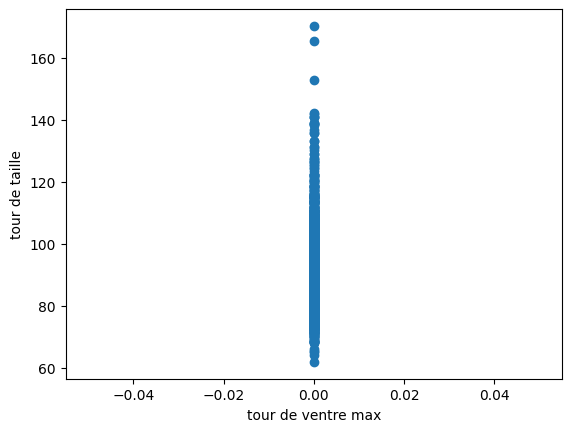

In [66]:
import matplotlib.pyplot as plt
# Plot Living area vs Sale price
plt.scatter(mesure['tour_de_ventre_maximal'], mesure['tour_de_taille'])
# Labels
plt.xlabel("tour de ventre max")
plt.ylabel("tour de taille")
plt.show()

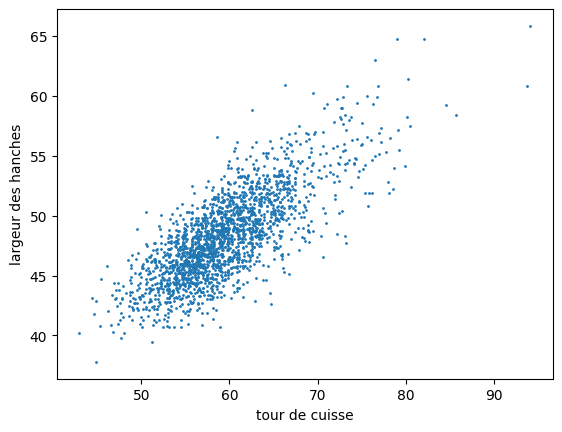

In [67]:
import matplotlib.pyplot as plt
# Plot Living area vs Sale price
plt.scatter(mesure['tour_de_cuisse'], mesure['largeur_des_hanches'],s=1)
# Labels
plt.xlabel("tour de cuisse")
plt.ylabel("largeur des hanches")
plt.show()

In [68]:
import pandas as pd

def classifier_morphologie(row):
    # Extraction des mesures
    tour_ventre = row['tour_de_ventre_maximal']
    tour_taille = row['tour_de_taille']
    tour_poitrine = row['tour_de_poitrine']
    tour_cuisse = row['tour_de_cuisse']
    largeur_hanches = row['largeur_des_hanches']
    
    # --- Cat√©gorie VENTRE (bas√©e sur le ratio ventre/taille) ---
    if tour_taille < 75:
        ventre = "plat"
    elif tour_taille < 90:
        ventre = "moyen"
    else:
        ventre = "rond"
    
    # --- Cat√©gorie TORSE (bas√©e sur le tour de poitrine seul ou compar√© √† la taille) ---
    if tour_poitrine < 85:
        torse = "fin"
    elif tour_poitrine < 100:
        torse = "moyen"
    else:
        torse = "large"
    
    # --- Cat√©gorie CUISSES (ratio cuisse / hanches) ---
    ratio_cuisse = tour_cuisse / largeur_hanches
    if ratio_cuisse < 0.55:
        cuisses = "fines"
    elif ratio_cuisse < 0.65:
        cuisses = "moyennes"
    else:
        cuisses = "larges"
    
    return pd.Series([ventre, torse, cuisses], 
                     index=['categorie_ventre', 'categorie_torse', 'categorie_cuisses'])
    
# Remplace `df` par le nom de ton DataFrame
data[['categorie_ventre', 'categorie_torse', 'categorie_cuisses']] = data.apply(classifier_morphologie, axis=1)

In [69]:
data.head()

taille   age      weight  sex  tour_de_cheville  longueur_du_bras  \
1510  189.7126  51.0  136.000489  1.0           31.4960           68.3006   
3898  178.9938  29.1   80.698553  1.0           26.0096           65.3034   
103   181.9910  36.0   93.199548  1.0           27.4066           59.9948   
2309  182.9054  62.0   90.491604  1.0           28.1940           66.1924   
3896  176.5046  26.9   64.500782  1.0           26.6954           64.9986   

      largeur_du_dos  tour_de_ventre_maximal  tour_de_poitrine  \
1510         47.5488                       0          132.7912   
3898         39.9034                       0           97.4090   
103              NaN                       0          105.1052   
2309         43.0530                       0          109.4994   
3896         43.0784                       0           91.4908   

      tour_de_poitrine_mesure_a_la_main  ...  longueur_de_sous_poitrine  \
1510                                NaN  ...                          0   
3898                                NaN  ...                          0   
103                                 NaN  ...                          0   
2309                                NaN  ...                          0   
3896                                NaN  ...                          0   

      largeur_de_la_taille  tour_de_poignet  largeur_du_bassin  \
1510                     0                0                  0   
3898                     0                0                  0   
103                      0                0                  0   
2309                     0                0                  0   
3896                     0                0                  0   

      profondeur_de_poitrine  tour_d_epaule  longueur_d_avant_bras  \
1510                       0              0                      0   
3898                       0              0                      0   
103                        0              0                      0   
2309                       0              0                      0   
3896                       0              0                      0   

      categorie_ventre  categorie_torse  categorie_cuisses  
1510              rond            large             larges  
3898             moyen            moyen             larges  
103               rond            large             larges  
2309              rond            large             larges  
3896             moyen            moyen             larges  

[5 rows x 47 columns]

In [70]:
data=data.loc[:, (data != 0).any()]

In [71]:
data.head()

taille   age      weight  sex  tour_de_cheville  longueur_du_bras  \
1510  189.7126  51.0  136.000489  1.0           31.4960           68.3006   
3898  178.9938  29.1   80.698553  1.0           26.0096           65.3034   
103   181.9910  36.0   93.199548  1.0           27.4066           59.9948   
2309  182.9054  62.0   90.491604  1.0           28.1940           66.1924   
3896  176.5046  26.9   64.500782  1.0           26.6954           64.9986   

      largeur_du_dos  tour_de_poitrine  tour_de_poitrine_mesure_a_la_main  \
1510         47.5488          132.7912                                NaN   
3898         39.9034           97.4090                                NaN   
103              NaN          105.1052                                NaN   
2309         43.0530          109.4994                                NaN   
3896         43.0784           91.4908                                NaN   

      hauteur_de_poitrine  ...  largeur_d_epaule  hauteur_des_epaules  \
1510             136.9060  ...           47.5488             154.1145   
3898             124.6124  ...           39.9034             145.9992   
103                   NaN  ...               NaN                  NaN   
2309             129.5908  ...           43.0530             150.7998   
3896             125.7046  ...           43.0784             142.0114   

      largeur_des_epaules_a_l_horizontales  \
1510                               52.5018   
3898                               50.5968   
103                                48.9966   
2309                               48.4124   
3896                               46.4058   

      longueur_de_la_colonne_vertebrale_jusqu_au_poignet  tour_de_cuisse  \
1510                                            91.5924          67.1068   
3898                                            83.4898          62.0014   
103                                             84.5058          64.5922   
2309                                            88.3920          57.9882   
3896                                            88.1888          51.5112   

      tour_de_taille  hauteur_de_la_taille  categorie_ventre  categorie_torse  \
1510        127.0000              109.4994              rond            large   
3898         88.0110              102.7938             moyen            moyen   
103         100.3046              104.9020              rond            large   
2309         92.8878              103.9876              rond            large   
3896         76.8096              102.5906             moyen            moyen   

      categorie_cuisses  
1510             larges  
3898             larges  
103              larges  
2309             larges  
3896             larges  

[5 rows x 26 columns]

In [72]:
data = data.dropna(how='all', axis=1)

In [73]:
data.head()

taille   age      weight  sex  tour_de_cheville  longueur_du_bras  \
1510  189.7126  51.0  136.000489  1.0           31.4960           68.3006   
3898  178.9938  29.1   80.698553  1.0           26.0096           65.3034   
103   181.9910  36.0   93.199548  1.0           27.4066           59.9948   
2309  182.9054  62.0   90.491604  1.0           28.1940           66.1924   
3896  176.5046  26.9   64.500782  1.0           26.6954           64.9986   

      largeur_du_dos  tour_de_poitrine  hauteur_de_poitrine  \
1510         47.5488          132.7912             136.9060   
3898         39.9034           97.4090             124.6124   
103              NaN          105.1052                  NaN   
2309         43.0530          109.4994             129.5908   
3896         43.0784           91.4908             125.7046   

      hauteur_d_entrejambe  ...  largeur_d_epaule  hauteur_des_epaules  \
1510               86.2076  ...           47.5488             154.1145   
3898               80.0100  ...           39.9034             145.9992   
103                82.8040  ...               NaN                  NaN   
2309               83.0072  ...           43.0530             150.7998   
3896               82.0928  ...           43.0784             142.0114   

      largeur_des_epaules_a_l_horizontales  \
1510                               52.5018   
3898                               50.5968   
103                                48.9966   
2309                               48.4124   
3896                               46.4058   

      longueur_de_la_colonne_vertebrale_jusqu_au_poignet  tour_de_cuisse  \
1510                                            91.5924          67.1068   
3898                                            83.4898          62.0014   
103                                             84.5058          64.5922   
2309                                            88.3920          57.9882   
3896                                            88.1888          51.5112   

      tour_de_taille  hauteur_de_la_taille  categorie_ventre  categorie_torse  \
1510        127.0000              109.4994              rond            large   
3898         88.0110              102.7938             moyen            moyen   
103         100.3046              104.9020              rond            large   
2309         92.8878              103.9876              rond            large   
3896         76.8096              102.5906             moyen            moyen   

      categorie_cuisses  
1510             larges  
3898             larges  
103              larges  
2309             larges  
3896             larges  

[5 rows x 25 columns]

In [81]:
import pandas as pd
import numpy as np

def remplacer_nan_par_moyenne(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            moyenne = df[col].mean(skipna=True)
            df[col] = df[col].fillna(moyenne)
    return df

data = remplacer_nan_par_moyenne(data)
data.head()

taille   age      weight  sex  tour_de_cheville  longueur_du_bras  \
1510  189.7126  51.0  136.000489  1.0           31.4960           68.3006   
3898  178.9938  29.1   80.698553  1.0           26.0096           65.3034   
103   181.9910  36.0   93.199548  1.0           27.4066           59.9948   
2309  182.9054  62.0   90.491604  1.0           28.1940           66.1924   
3896  176.5046  26.9   64.500782  1.0           26.6954           64.9986   

      largeur_du_dos  tour_de_poitrine  hauteur_de_poitrine  \
1510       47.548800          132.7912           136.906000   
3898       39.903400           97.4090           124.612400   
103        41.485936          105.1052           128.796549   
2309       43.053000          109.4994           129.590800   
3896       43.078400           91.4908           125.704600   

      hauteur_d_entrejambe  ...  largeur_d_epaule  hauteur_des_epaules  \
1510               86.2076  ...         47.548800            154.11450   
3898               80.0100  ...         39.903400            145.99920   
103                82.8040  ...         41.485936            145.86253   
2309               83.0072  ...         43.053000            150.79980   
3896               82.0928  ...         43.078400            142.01140   

      largeur_des_epaules_a_l_horizontales  \
1510                               52.5018   
3898                               50.5968   
103                                48.9966   
2309                               48.4124   
3896                               46.4058   

      longueur_de_la_colonne_vertebrale_jusqu_au_poignet  tour_de_cuisse  \
1510                                            91.5924          67.1068   
3898                                            83.4898          62.0014   
103                                             84.5058          64.5922   
2309                                            88.3920          57.9882   
3896                                            88.1888          51.5112   

      tour_de_taille  hauteur_de_la_taille  categorie_ventre  categorie_torse  \
1510        127.0000              109.4994              rond            large   
3898         88.0110              102.7938             moyen            moyen   
103         100.3046              104.9020              rond            large   
2309         92.8878              103.9876              rond            large   
3896         76.8096              102.5906             moyen            moyen   

      categorie_cuisses  
1510             larges  
3898             larges  
103              larges  
2309             larges  
3896             larges  

[5 rows x 25 columns]

In [82]:
from sklearn.preprocessing import OneHotEncoder

# Colonnes √† encoder
colonnes_cat = ['categorie_ventre', 'categorie_torse', 'categorie_cuisses']

# Afficher les valeurs uniques pour v√©rification
for col in colonnes_cat:
    print(f"Valeurs uniques pour '{col}' :", data[col].unique())

# Instancier OneHotEncoder avec drop='if_binary' (garde 1 seule colonne pour les colonnes binaires)
ohe = OneHotEncoder(sparse_output=False, drop='if_binary')

# Fit + transform sur les colonnes s√©lectionn√©es
encoded_array = ohe.fit_transform(data[colonnes_cat])

# Obtenir les noms des nouvelles colonnes g√©n√©r√©es
encoded_col_names = ohe.get_feature_names_out(colonnes_cat)

# Cr√©er un DataFrame avec les colonnes encod√©es
df_encoded = pd.DataFrame(encoded_array, columns=encoded_col_names, index=data.index)

# Fusionner avec le DataFrame d‚Äôorigine
mesure_sc = pd.concat([data.drop(columns=colonnes_cat), df_encoded], axis=1)

# Aper√ßu du DataFrame final
mesure_sc.head()


Valeurs uniques pour 'categorie_ventre' : ['rond' 'moyen' 'plat']
Valeurs uniques pour 'categorie_torse' : ['large' 'moyen' 'fin']
Valeurs uniques pour 'categorie_cuisses' : ['larges']


taille   age      weight  sex  tour_de_cheville  longueur_du_bras  \
1510  189.7126  51.0  136.000489  1.0           31.4960           68.3006   
3898  178.9938  29.1   80.698553  1.0           26.0096           65.3034   
103   181.9910  36.0   93.199548  1.0           27.4066           59.9948   
2309  182.9054  62.0   90.491604  1.0           28.1940           66.1924   
3896  176.5046  26.9   64.500782  1.0           26.6954           64.9986   

      largeur_du_dos  tour_de_poitrine  hauteur_de_poitrine  \
1510       47.548800          132.7912           136.906000   
3898       39.903400           97.4090           124.612400   
103        41.485936          105.1052           128.796549   
2309       43.053000          109.4994           129.590800   
3896       43.078400           91.4908           125.704600   

      hauteur_d_entrejambe  ...  tour_de_cuisse  tour_de_taille  \
1510               86.2076  ...         67.1068        127.0000   
3898               80.0100  ...         62.0014         88.0110   
103                82.8040  ...         64.5922        100.3046   
2309               83.0072  ...         57.9882         92.8878   
3896               82.0928  ...         51.5112         76.8096   

      hauteur_de_la_taille  categorie_ventre_moyen  categorie_ventre_plat  \
1510              109.4994                     0.0                    0.0   
3898              102.7938                     1.0                    0.0   
103               104.9020                     0.0                    0.0   
2309              103.9876                     0.0                    0.0   
3896              102.5906                     1.0                    0.0   

      categorie_ventre_rond  categorie_torse_fin  categorie_torse_large  \
1510                    1.0                  0.0                    1.0   
3898                    0.0                  0.0                    0.0   
103                     1.0                  0.0                    1.0   
2309                    1.0                  0.0                    1.0   
3896                    0.0                  0.0                    0.0   

      categorie_torse_moyen  categorie_cuisses_larges  
1510                    0.0                       1.0  
3898                    1.0                       1.0  
103                     0.0                       1.0  
2309                    0.0                       1.0  
3896                    1.0                       1.0  

[5 rows x 29 columns]

In [83]:
from sklearn.preprocessing import RobustScaler

# üü° Colonnes √† exclure du scaling
colonnes_a_exclure = [
    'longueur_du_bras', 'longueur_bras_binaire', 
    'categorie_ventre', 'categorie_torse', 'categorie_cuisses',
    'categorie_ventre_rond', 'categorie_torse_fin', 
    'categorie_torse_large', 'categorie_torse_moyen', 
    'categorie_cuisses_larges'
]

# üü¢ Colonnes √† scaler (toutes les autres)
colonnes_a_scaler = [col for col in mesure_sc.columns if col not in colonnes_a_exclure]

# ‚öôÔ∏è Instanciation et application du RobustScaler
scaler = RobustScaler()
df_scaled = mesure_sc.copy()
df_scaled[colonnes_a_scaler] = scaler.fit_transform(df_scaled[colonnes_a_scaler])
df_scaled.head()

taille       age    weight  sex  tour_de_cheville  longueur_du_bras  \
1510  1.100686  0.673077  2.715922  0.0          2.443038           68.3006   
3898  0.135011 -0.379808  0.031050  0.0         -0.291139           65.3034   
103   0.405034 -0.048077  0.637965  0.0          0.405063           59.9948   
2309  0.487414  1.201923  0.506496  0.0          0.797468           66.1924   
3896 -0.089245 -0.485577 -0.755340  0.0          0.050633           64.9986   

      largeur_du_dos  tour_de_poitrine  hauteur_de_poitrine  \
1510        1.940613          2.447217             0.945985   
3898       -0.506541         -0.226488            -0.467153   
103         0.000000          0.355086             0.013811   
2309        0.501589          0.687140             0.105109   
3896        0.509719         -0.673704            -0.341606   

      hauteur_d_entrejambe  ...  tour_de_cuisse  tour_de_taille  \
1510              0.710884  ...        1.199275        2.857143   
3898             -0.119048  ...        0.471014       -0.028195   
103               0.255102  ...        0.840580        0.881579   
2309              0.282313  ...       -0.101449        0.332707   
3896              0.159864  ...       -1.025362       -0.857143   

      hauteur_de_la_taille  categorie_ventre_moyen  categorie_ventre_plat  \
1510              0.706840                    -1.0                    0.0   
3898             -0.153094                     0.0                    0.0   
103               0.117264                    -1.0                    0.0   
2309              0.000000                    -1.0                    0.0   
3896             -0.179153                     0.0                    0.0   

      categorie_ventre_rond  categorie_torse_fin  categorie_torse_large  \
1510                    1.0                  0.0                    1.0   
3898                    0.0                  0.0                    0.0   
103                     1.0                  0.0                    1.0   
2309                    1.0                  0.0                    1.0   
3896                    0.0                  0.0                    0.0   

      categorie_torse_moyen  categorie_cuisses_larges  
1510                    0.0                       1.0  
3898                    1.0                       1.0  
103                     0.0                       1.0  
2309                    0.0                       1.0  
3896                    1.0                       1.0  

[5 rows x 29 columns]

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

def entrainer_regression_par_colonne(df, colonnes_explicatives, colonnes_cibles):
    """
    Entra√Æne une r√©gression lin√©aire pour chaque colonne cible dans colonnes_cibles
    en utilisant les colonnes_explicatives comme variables d'entr√©e.

    Args:
        df (pd.DataFrame): Le DataFrame contenant les donn√©es.
        colonnes_explicatives (list): Liste des noms de colonnes √† utiliser comme X.
        colonnes_cibles (list): Liste des noms de colonnes √† pr√©dire.

    Returns:
        dict: dictionnaire contenant pour chaque cible, son mod√®le entra√Æn√© et le score R¬≤.
    """
    resultats = {}

    for cible in colonnes_cibles:
        X = df[colonnes_explicatives]
        y = df[cible]

        model = LinearRegression()
        model.fit(X, y)
        score = model.score(X, y)

        resultats[cible] = {
            'modele': model,
            'score': score
        }

        print(f"‚úÖ Mod√®le entra√Æn√© pour {cible} ‚Äî Score R¬≤ : {score:.4f}")

    return resultats

# Exemple d‚Äôutilisation :
colonnes_X = ['taille', 'age', 'weight',
              'categorie_ventre_plat', 'categorie_ventre_moyen', 'categorie_ventre_rond',
              'categorie_torse_fin', 'categorie_torse_moyen', 'categorie_torse_large',
              'categorie_cuisses_fines', 'categorie_cuisses_moyennes', 'categorie_cuisses_larges']

colonnes_X_valides = [col for col in colonnes_X if col in df_scaled.columns]


# Par exemple, toutes les colonnes sauf colonnes_X sont cibles
colonnes_y = [col for col in df_scaled.columns if col not in colonnes_X]

imputer = SimpleImputer(strategy='median')  # ou strategy='mean'
df_imputed = pd.DataFrame(imputer.fit_transform(df_scaled), columns=df_scaled.columns)


resultats = entrainer_regression_par_colonne(df_imputed, colonnes_X_valides, colonnes_y)


‚úÖ Mod√®le entra√Æn√© pour sex ‚Äî Score R¬≤ : 1.0000
‚úÖ Mod√®le entra√Æn√© pour tour_de_cheville ‚Äî Score R¬≤ : 0.5767
‚úÖ Mod√®le entra√Æn√© pour longueur_du_bras ‚Äî Score R¬≤ : 0.6075
‚úÖ Mod√®le entra√Æn√© pour largeur_du_dos ‚Äî Score R¬≤ : 0.4207
‚úÖ Mod√®le entra√Æn√© pour tour_de_poitrine ‚Äî Score R¬≤ : 0.9165
‚úÖ Mod√®le entra√Æn√© pour hauteur_de_poitrine ‚Äî Score R¬≤ : 0.8919
‚úÖ Mod√®le entra√Æn√© pour hauteur_d_entrejambe ‚Äî Score R¬≤ : 0.8111
‚úÖ Mod√®le entra√Æn√© pour longueur_avant ‚Äî Score R¬≤ : 0.5121
‚úÖ Mod√®le entra√Æn√© pour largeur_des_hanches ‚Äî Score R¬≤ : 0.6911
‚úÖ Mod√®le entra√Æn√© pour hauteur_des_hanches ‚Äî Score R¬≤ : 0.6974
‚úÖ Mod√®le entra√Æn√© pour hauteur_des_genoux ‚Äî Score R¬≤ : 0.7951
‚úÖ Mod√®le entra√Æn√© pour tour_du_cou ‚Äî Score R¬≤ : 0.4807
‚úÖ Mod√®le entra√Æn√© pour largeur_d_epaule ‚Äî Score R¬≤ : 0.4207
‚úÖ Mod√®le entra√Æn√© pour hauteur_des_epaules ‚Äî Score R¬≤ : 0.9094
‚úÖ Mod√®le entra√Æn√© pour largeur_des_epaules_a_l_

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
import pandas as pd

def entrainer_regression_par_colonne(df, colonnes_explicatives, colonnes_cibles, test_size=0.2, random_state=42):
    """
    Entra√Æne une r√©gression lin√©aire pour chaque colonne cible, avec train_test_split.

    Args:
        df (pd.DataFrame): Le DataFrame complet.
        colonnes_explicatives (list): Noms des colonnes √† utiliser comme variables d'entr√©e (X).
        colonnes_cibles (list): Noms des colonnes √† pr√©dire (y).
        test_size (float): Proportion du jeu de test (entre 0 et 1).
        random_state (int): Graine pour la reproductibilit√©.

    Returns:
        dict: Pour chaque colonne cible, le mod√®le, score R¬≤ (train & test).
    """
    resultats = {}

    # 1. Imputer les NaN
    imputer = SimpleImputer(strategy='median')
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

    for cible in colonnes_cibles:
        X = df_imputed[colonnes_explicatives]
        y = df_imputed[cible]

        # 2. Split des donn√©es
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )

        # 3. Entra√Ænement
        model = LinearRegression()
        model.fit(X_train, y_train)

        # 4. √âvaluation
        score_train = model.score(X_train, y_train)
        score_test = model.score(X_test, y_test)

        resultats[cible] = {
            'modele': model,
            'score_train': score_train,
            'score_test': score_test
        }

        print(f"‚úÖ {cible} ‚Äî R¬≤ train: {score_train:.4f} | test: {score_test:.4f}")

    return resultats
    
colonnes_X = ['taille', 'age', 'weight',
              'categorie_ventre_plat', 'categorie_ventre_moyen', 'categorie_ventre_rond',
              'categorie_torse_fin', 'categorie_torse_moyen', 'categorie_torse_large',
              'categorie_cuisses_fines', 'categorie_cuisses_moyennes', 'categorie_cuisses_larges']

colonnes_X_valides = [col for col in colonnes_X if col in df_scaled.columns]


# Par exemple, toutes les colonnes sauf colonnes_X sont cibles
colonnes_y = [col for col in df_scaled.columns if col not in colonnes_X]

resultats = entrainer_regression_par_colonne(df_scaled, colonnes_X_valides, colonnes_y)

‚úÖ sex ‚Äî R¬≤ train: 1.0000 | test: 1.0000
‚úÖ tour_de_cheville ‚Äî R¬≤ train: 0.5717 | test: 0.5883
‚úÖ longueur_du_bras ‚Äî R¬≤ train: 0.6096 | test: 0.5948
‚úÖ largeur_du_dos ‚Äî R¬≤ train: 0.4270 | test: 0.3905
‚úÖ tour_de_poitrine ‚Äî R¬≤ train: 0.9172 | test: 0.9119
‚úÖ hauteur_de_poitrine ‚Äî R¬≤ train: 0.8990 | test: 0.8639
‚úÖ hauteur_d_entrejambe ‚Äî R¬≤ train: 0.8080 | test: 0.8225
‚úÖ longueur_avant ‚Äî R¬≤ train: 0.5186 | test: 0.4796
‚úÖ largeur_des_hanches ‚Äî R¬≤ train: 0.6935 | test: 0.6758
‚úÖ hauteur_des_hanches ‚Äî R¬≤ train: 0.6832 | test: 0.7493
‚úÖ hauteur_des_genoux ‚Äî R¬≤ train: 0.7998 | test: 0.7756
‚úÖ tour_du_cou ‚Äî R¬≤ train: 0.4908 | test: 0.4251
‚úÖ largeur_d_epaule ‚Äî R¬≤ train: 0.4270 | test: 0.3905
‚úÖ hauteur_des_epaules ‚Äî R¬≤ train: 0.9174 | test: 0.8767
‚úÖ largeur_des_epaules_a_l_horizontales ‚Äî R¬≤ train: 0.6935 | test: 0.6758
‚úÖ longueur_de_la_colonne_vertebrale_jusqu_au_poignet ‚Äî R¬≤ train: 0.6911 | test: 0.6348
‚úÖ tour_de_cuisse ‚Äî

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

def entrainer_regression_cv(df, colonnes_explicatives, colonnes_cibles, n_splits=5, random_state=42):
    """
    Entra√Æne une r√©gression lin√©aire pour chaque colonne cible avec K-Fold Cross Validation.

    Args:
        df (pd.DataFrame): Le DataFrame complet.
        colonnes_explicatives (list): Noms des colonnes explicatives.
        colonnes_cibles (list): Noms des colonnes cibles.
        n_splits (int): Nombre de folds pour la validation crois√©e.
        random_state (int): Graine pour la reproductibilit√©.

    Returns:
        dict: Pour chaque cible, moyenne et √©cart-type du score R¬≤ sur les folds.
    """
    resultats = {}

    # 1. Imputation des NaN
    imputer = SimpleImputer(strategy='median')
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

    # 2. Configuration du K-Fold
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    for cible in colonnes_cibles:
        X = df_imputed[colonnes_explicatives]
        y = df_imputed[cible]

        modele = LinearRegression()

        # 3. Cross-validation sur R¬≤
        scores = cross_val_score(modele, X, y, cv=kf, scoring='r2')

        resultats[cible] = {
            'r2_moyen': np.mean(scores),
            'r2_ecart_type': np.std(scores),
            'r2_scores': scores
        }

        print(f"‚úÖ {cible} ‚Äî R¬≤ moyen: {np.mean(scores):.4f} ¬± {np.std(scores):.4f}")

    return resultats
colonnes_X = ['taille', 'age', 'weight',
              'categorie_ventre_plat', 'categorie_ventre_moyen', 'categorie_ventre_rond',
              'categorie_torse_fin', 'categorie_torse_moyen', 'categorie_torse_large',
              'categorie_cuisses_fines', 'categorie_cuisses_moyennes', 'categorie_cuisses_larges']

colonnes_X_valides = [col for col in colonnes_X if col in df_scaled.columns]
colonnes_y = [col for col in df_scaled.columns if col not in colonnes_X_valides]

resultats_cv = entrainer_regression_cv(df_scaled, colonnes_X_valides, colonnes_y, n_splits=5)


‚úÖ sex ‚Äî R¬≤ moyen: 1.0000 ¬± 0.0000
‚úÖ tour_de_cheville ‚Äî R¬≤ moyen: 0.5694 ¬± 0.0214
‚úÖ longueur_du_bras ‚Äî R¬≤ moyen: 0.6041 ¬± 0.0170
‚úÖ largeur_du_dos ‚Äî R¬≤ moyen: 0.4151 ¬± 0.0342
‚úÖ tour_de_poitrine ‚Äî R¬≤ moyen: 0.9149 ¬± 0.0086
‚úÖ hauteur_de_poitrine ‚Äî R¬≤ moyen: 0.8915 ¬± 0.0156
‚úÖ hauteur_d_entrejambe ‚Äî R¬≤ moyen: 0.8098 ¬± 0.0141
‚úÖ longueur_avant ‚Äî R¬≤ moyen: 0.5074 ¬± 0.0221
‚úÖ largeur_des_hanches ‚Äî R¬≤ moyen: 0.6885 ¬± 0.0124
‚úÖ hauteur_des_hanches ‚Äî R¬≤ moyen: 0.6942 ¬± 0.0321
‚úÖ hauteur_des_genoux ‚Äî R¬≤ moyen: 0.7936 ¬± 0.0121
‚úÖ tour_du_cou ‚Äî R¬≤ moyen: 0.4718 ¬± 0.0339
‚úÖ largeur_d_epaule ‚Äî R¬≤ moyen: 0.4151 ¬± 0.0342
‚úÖ hauteur_des_epaules ‚Äî R¬≤ moyen: 0.9085 ¬± 0.0175
‚úÖ largeur_des_epaules_a_l_horizontales ‚Äî R¬≤ moyen: 0.6885 ¬± 0.0124
‚úÖ longueur_de_la_colonne_vertebrale_jusqu_au_poignet ‚Äî R¬≤ moyen: 0.6766 ¬± 0.0247
‚úÖ tour_de_cuisse ‚Äî R¬≤ moyen: 0.8263 ¬± 0.0091
‚úÖ tour_de_taille ‚Äî R¬≤ moyen: 0.8859 ¬± 0.0166
